In [2]:
# Importing modules
from os import path
from pybevc import PyBEVC
from pybevc.test.data import test_data_path
from pybevc.file_io import read_operation
import matplotlib.pyplot as plt
import hvplot.xarray

In [8]:
# Instanciating a PyBEVC object
bevc = PyBEVC()
# Printing all solver inputs
bevc


**Blade center line**<br>`s`,  Node variable. Determines the number and location of each node.     (commonly the blade half chord curve length)<br>`x`,  x-value (positive tangential - positive for forward sweep) of blade half chord [m]<br>`y`,  y-value (positive down-stream - negative for upwind prebend) of blade half chord [m]<br>`z`,  z-value (positive for increasing radial) of blade half chord (not including hub radius) [m]<br><br>**Planform**<br>`chord`,  Blade chord [m]<br>`rt`,  Relative airfoil profile thickness along s. If not set it defaults for s.<br>`twist_rad` (alt: `twist_deg`),  Blade twist [radians]<br><br>**Aero polars**<br>`aoa_rad` (alt: `aoa_deg`),  Angle-of-Attack for aero polars [radians]<br>`c_d`,  Drag-coefficient table [-]<br>`c_l`,  Lift-coefficient table [-]<br>`c_m`,  Moment-coefficient table [-]<br>`s_polar`,  Node variable for polars. If not set it is assumed to be the same as s<br><br>**Rotor operational and inflow condition**<br>`NB`,   Number of blades [#] <br>`TSR` (alt: `omega_rpm`, `omega_rads`),  Rotor tip-speed-ration (omega*R/U0) [-]<br>`U0`,  Free-stream wind speed [m/s]<br>`cone_rad` (alt: `cone_deg`),  Rotor cone [radians]<br>`density`,  Air flow density [kg/m^3]<br>`omega_rads` (alt: `omega_rpm`, `TSR`),  Rotor rotational speed [rad/s]<br>`pitch_rad` (alt: `pitch_deg`),  Blade pitch [radians]<br>`r_hub`,  Rotor hub radius (0 means blade root at the center of rotation) [m]<br>`x_cp`,  The definition of the main-axis. 0.25=1/4 chord point, 0.5=1/2 chord point [-]<br><br>**Solver settings**<br>`beta1`,  Solver relaxation factor<br>`max_iter`,  Maximum number of iterations for the solver<br>`solver`,  Name of the solver shared object file<br>`solver_path`,  Path for the solver shared object file (if None it is assumed to be in the python lib aesopt/bevc)<br>`tol`,  Solver tolerance<br><br>**Solver options**<br>`flag_1p_corr`,  Flag to enable 1p correction<br>`flag_NW`,  Flag to enable near-wake model<br>`flag_a_CT`,  Integer-flag for choosing the relationship between axial-induction factor and local-CT     (1:HAWC2 polynomial, 2:CT=4a(1-a) with C2 high-load correction)<br>`flag_planar_VC`,  Flag to disable non-planar effects: (1)flag_NW=false: ordinary BEM; (2)flag_NW=true:NW+planar VC<br>`flag_wake_rot`,  Flag to enable the wake rotation effect<br>`return_xarray`,  Flag for returning xarray (default to True if xarray is installed)<br><br>**AEP options**<br>`A_weibull`,  Mean wind speed for Weibull distribution [m/s]<br>`k_weibull`,  Shape factor for Weibull distribution [-]<br>

In [9]:
# Setting inputs manually 
bevc.U0 = 8.0
bevc.TSR = 7
bevc.flag_a_CT = 2

# htc_filename = 'iea15mw_bevc/IEA-15-240-RWT-Onshore/htc/IEA_15MW_RWT_Onshore.htc'
# ae_filename = 'iea15mw_bevc/IEA-15-240-RWT/IEA_15MW_RWT_ae.dat'
# pc_filename = 'iea15mw_bevc/IEA-15-240-RWT/IEA_15MW_RWT_Blade_st_noFPM.st'
# bevc.from_htc_file(htc_filename, model_path='data') # HAWC2 HTC file

# c2_filename = 'iea15mw_bevc/c2_pos.dat'


# Setting inputs from files
#bevc.from_dict(bevc_inp_dict) # Setting input from a dict
bevc.from_windIO(path.join(test_data_path, "IEA-3.4-130-RWT.yaml"));  # windIO file
#bevc.from_htc_file(htc_filename) # HAWC2 HTC file
#bevc.from_ae_file(ae_filename) # HAWC2 AE file
#bevc.from_pc_file(pc_filename) # HAWC2 PC file
# bevc.from_c2_file(c2_filename) # HAWC2 C2 file

In [5]:
# Display all data as an Xarray object
xr_inp = bevc.as_xarray()
xr_inp

<xarray.Dataset> Size: 46kB
Dimensions:         (s_polar: 7, aoa: 145, s: 50)
Coordinates:
  * s_polar         (s_polar) float64 56B 21.0 25.0 30.0 35.0 40.0 50.0 100.0
  * aoa             (aoa) float64 1kB -180.0 -175.0 -170.0 ... 170.0 175.0 180.0
  * s               (s) float64 400B 0.0 0.01667 0.03333 0.05 ... 0.97 0.985 1.0
Data variables: (12/36)
    NB              int64 8B 3
    R               float64 8B 64.91
    TSR             int64 8B 7
    U0              float64 8B 8.0
    aoa_deg         (s_polar, aoa) float64 8kB -180.0 -175.0 ... 175.0 180.0
    aoa_rad         (s_polar, aoa) float64 8kB -3.141 -3.054 ... 3.054 3.141
    ...              ...
    twist_deg       (s) float64 400B -20.0 -19.77 -19.48 ... 3.485 4.028 4.641
    twist_rad       (s) float64 400B -0.349 -0.345 -0.34 ... 0.0703 0.081
    x               (s) float64 400B -0.0 -0.01374 -0.04514 ... -0.1301 -0.04984
    x_cp            float64 8B 0.5
    y               (s) float64 400B 0.0 0.004939 0.01597 ... -2.368 -2.504
    z               (s) float64 400B 0.0 1.05 2.1 3.15 ... 61.11 62.05 63.0

In [6]:
try:
    bevc.chord = [0.2, 10.0]
except Exception as exc:
    print(f"ValueError: {exc}")
print()
try:
    bevc.flag_wake_rot = 10
except Exception as exc:
    print(f"ValueError: {exc}")

ValueError: chord need to have the same size as s (given: np.size(s)=50, np.size(chord)=2)

ValueError: flag_wake_rot need to be <class 'bool'> (given: type(flag_wake_rot)=<class 'int'>)


## Plotting the input

KeyboardInterrupt: 

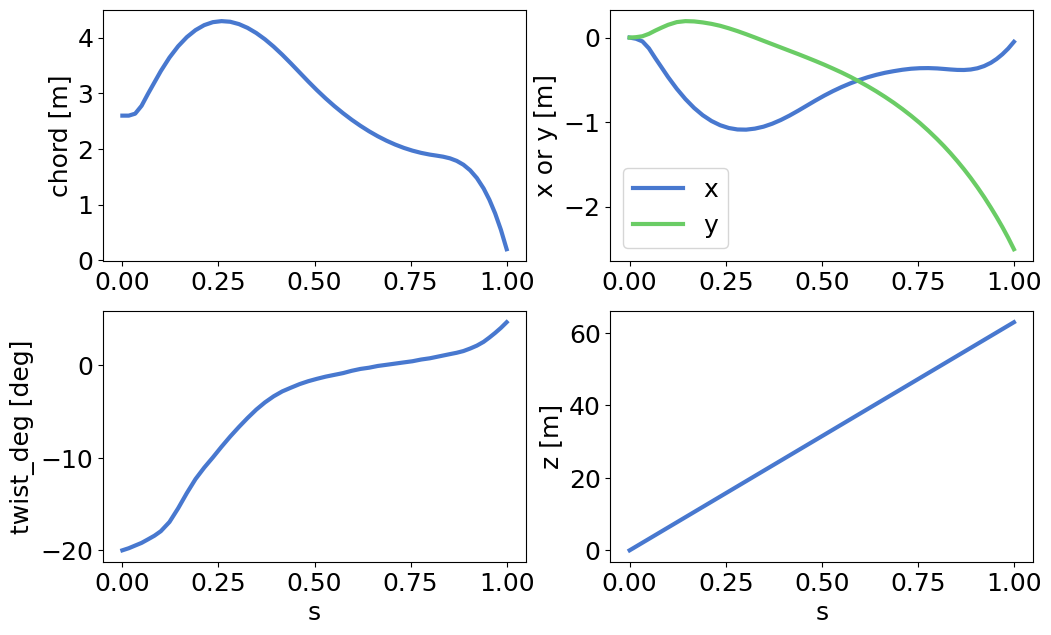

In [7]:
# Plotting planform and center line
# Creating axis
fig, axs = plt.subplots(2, 2)
axs = axs.T.flatten()
# Adding plots to axis
xr_inp["chord"].plot(ax=axs[0])
xr_inp["twist_deg"].plot(ax=axs[1])
xr_inp["x"].plot(ax=axs[2], label="x")
xr_inp["y"].plot(ax=axs[2], label="y")
xr_inp["z"].plot(ax=axs[3])

# Setting labels
axs[0].set_xlabel(None)
axs[2].set_xlabel(None)
axs[2].set_ylabel("x or y [m]")
# Adding legend and making layout tight
axs[2].legend()
fig.tight_layout()

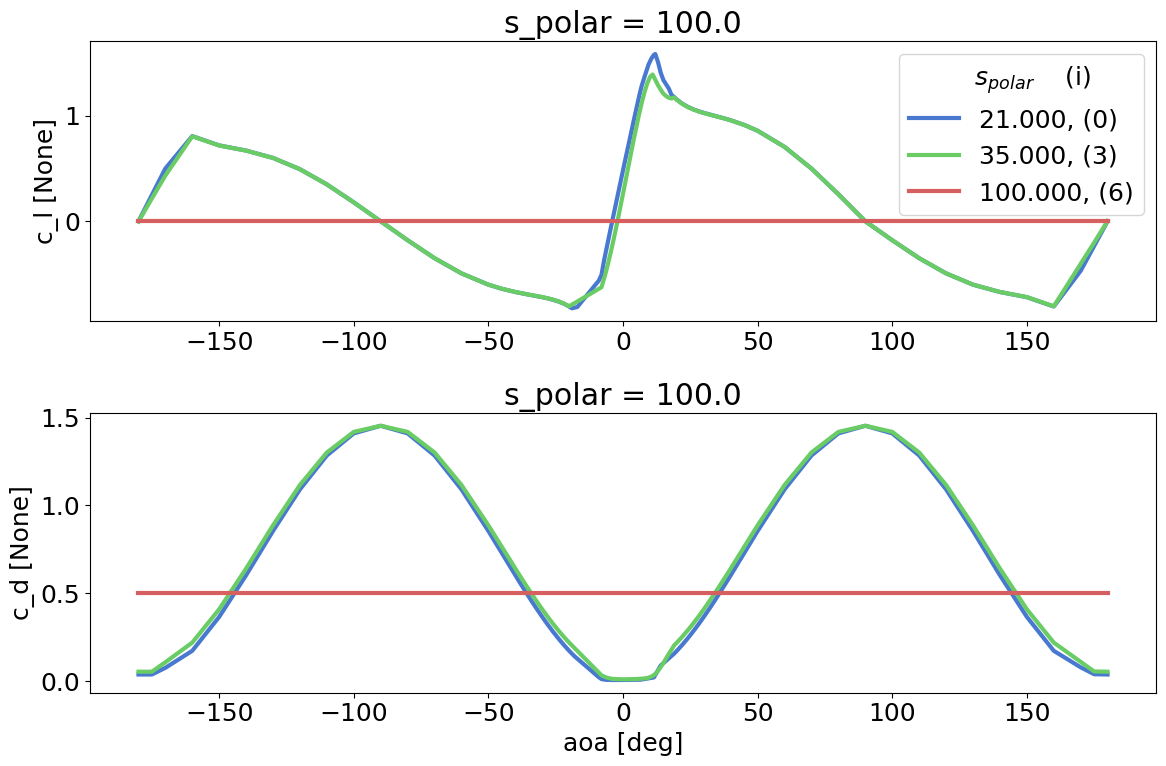

In [ ]:
# Plotting aoa_deg vs. cl, cd
# Creating axis
fig, axs = plt.subplots(2, 1)
i_s_polars = [0, 3, 6]  # Index for the polar to be plotted
# Adding plots to axis
for isp in i_s_polars:
    sel = xr_inp.isel(s_polar=isp)
    sp = float(sel["s_polar"])
    sel["c_l"].plot(ax=axs[0], label=f"{sp:1.3f}, ({isp})")
    sel["c_d"].plot(ax=axs[1])
# Setting labels
axs[0].set_xlabel(None)
axs[0].legend(title="   $s_{polar}$    (i)")
# Making the layout tight
fig.tight_layout()

In [ ]:
# With hvplot
(xr_inp["c_l"].hvplot(by="s_polar")
+xr_inp["c_d"].hvplot(by="s_polar")).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [s_polar]
      :Curve   [aoa]   (c_l)
   .NdOverlay.II :NdOverlay   [s_polar]
      :Curve   [aoa]   (c_d)

## Running the solver

In [ ]:
# Running the BEVC solver and returning an Xarray DataSet
res = bevc.run()
# Setting input from bevc object
bevc.add_inp_to_out(res)
# Setting computed values (e.g. CT, CP, CLT, CLP)
res.bevc_com_vals.set_all()
# Showing the data
res

<xarray.Dataset> Size: 63kB
Dimensions:         (s: 50, s_polar: 7, aoa: 145)
Coordinates:
  * s               (s) float64 400B 0.0 0.01667 0.03333 0.05 ... 0.97 0.985 1.0
  * s_polar         (s_polar) float64 56B 21.0 25.0 30.0 35.0 40.0 50.0 100.0
  * aoa             (aoa) float64 1kB -180.0 -175.0 -170.0 ... 170.0 175.0 180.0
Data variables: (12/87)
    r               (s) float64 400B 3.049 3.049 4.098 ... 62.91 63.84 63.84
    phi_rad         (s) float64 400B 1.252 1.252 1.15 ... 0.109 0.1117 0.1117
    V_rel           (s) float64 400B 8.419 8.419 8.745 ... 54.71 55.45 55.45
    alpha_deg       (s) float64 400B 0.0 51.79 46.27 40.98 ... 9.697 10.41 0.0
    Ct_KJ           (s) float64 400B 0.0 0.0 0.003536 ... 0.4483 0.303 0.0
    Ct_local        (s) float64 400B 0.0 0.2083 0.1707 ... 0.4487 0.3033 0.0
    ...              ...
    y               (s) float64 400B 0.0 0.004939 0.01597 ... -2.368 -2.504
    z               (s) float64 400B 0.0 1.05 2.1 3.15 ... 61.11 62.05 63.0
    CLP             (s) float64 400B 0.0 -0.02412 -0.03084 ... 0.3007 0.2095 0.0
    CLT             (s) float64 400B 0.0 0.208 0.1705 ... 0.4404 0.297 0.0
    CP              float64 8B 0.4646
    CT              float64 8B 0.6998

## Plotting the output

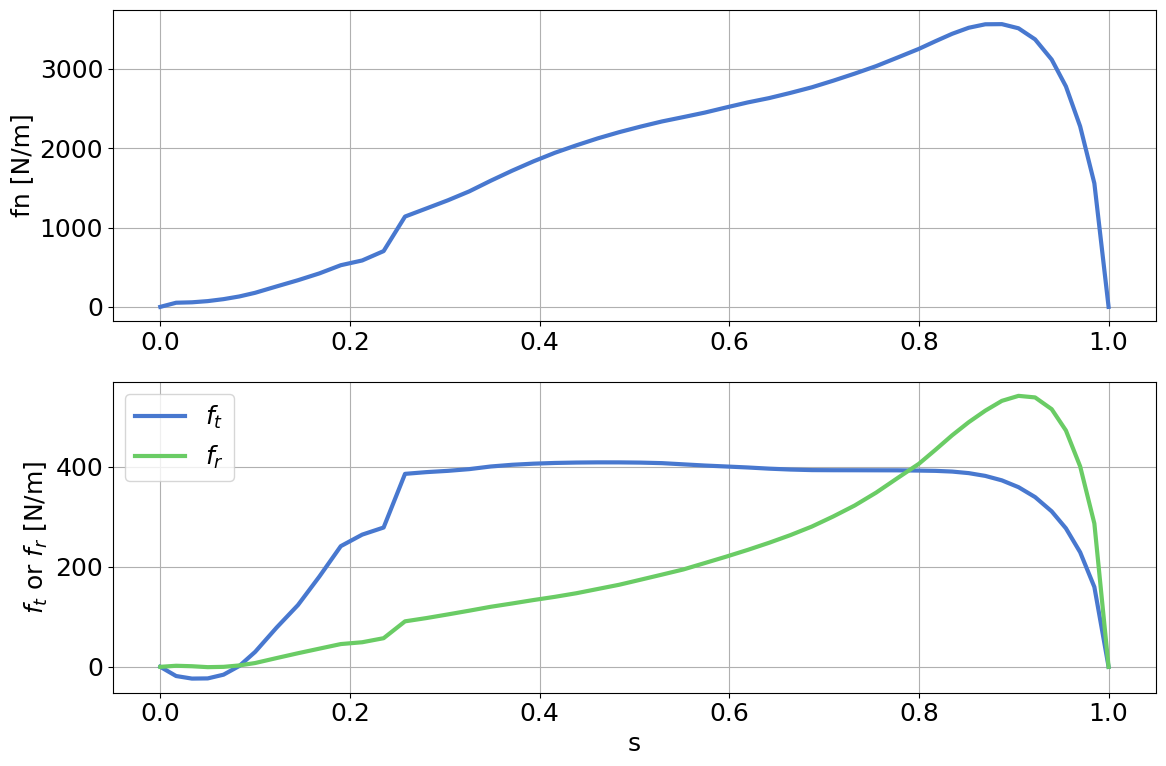

In [ ]:
# Plotting distributed forces
fig, axs = plt.subplots(2, 1)  

# Adding traces
res["fn"].plot(ax=axs[0])
res["ft"].plot(ax=axs[1], label="$f_t$")
res["fr"].plot(ax=axs[1], label="$f_r$")
# Removing/setting labels
axs[0].set_xlabel(None)
axs[1].set_ylabel("$f_t$ or $f_r$ [N/m]")
# Adding grids
axs[0].grid("on")
axs[1].grid("on")
# Making layout tight
axs[1].legend()
fig.tight_layout()

## Running the solver across a set of variables 

In [ ]:
# Loading operational data
oper_data = read_operation(path.join(test_data_path, "HAWC2_files", "data", "operation.dat"))
print(oper_data)
# Creating PyBEVC instance with DTU 10MW htc file
bevc = PyBEVC()
bevc.U0 = oper_data["U0"][0]
bevc.omega_rpm = oper_data["omega_rpm"][0] 
bevc.from_htc_file(path.join(test_data_path, "HAWC2_files", "htc", "DTU_10MW_RWT.htc"));  # windIO file
bevc.as_xarray()

{'U0': array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25.]), 'pitch_deg': array([ 1.52,  0.46,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  4.1 ,  6.69,
        8.62, 10.26, 11.74, 13.1 , 14.38, 15.59, 16.76, 17.88, 18.97,
       20.03, 21.05, 22.05]), 'omega_rpm': array([6.  , 6.  , 6.37, 7.28, 8.19, 9.1 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 ,
       9.6 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 , 9.6 ])}


<xarray.Dataset> Size: 28kB
Dimensions:         (s_polar: 6, aoa: 105, s: 27)
Coordinates:
  * s_polar         (s_polar) float64 48B 24.1 30.1 36.0 48.0 60.0 100.0
  * aoa             (aoa) float64 840B -180.0 -175.0 -170.0 ... 175.0 180.0
  * s               (s) float64 216B 5.142e-18 0.03474 0.06947 ... 0.9845 1.0
Data variables: (12/36)
    NB              int64 8B 3
    R               float64 8B 89.08
    TSR             float64 8B 13.99
    U0              int64 8B 4
    aoa_deg         (s_polar, aoa) float64 5kB -180.0 -175.0 ... 175.0 180.0
    aoa_rad         (s_polar, aoa) float64 5kB -3.142 -3.054 ... 3.054 3.142
    ...              ...
    twist_deg       (s) float64 216B -14.5 -14.5 -14.49 ... 3.119 3.288 3.428
    twist_rad       (s) float64 216B -0.2531 -0.2531 -0.2528 ... 0.05739 0.05983
    x               (s) float64 216B 0.0 -2.065e-05 ... -0.2079 -0.08989
    x_cp            float64 8B 0.5
    y               (s) float64 216B 7.006e-05 -0.01221 ... -3.21 -3.337
    z               (s) float64 216B 4.441e-16 3.0 6.0 7.0 ... 83.53 85.03 86.37

In [ ]:
 # Running the sweep
out = bevc.run_sweep("U0", **oper_data)
# Setting input from bevc object
bevc.add_inp_to_out(out)
# Setting computed values (e.g. CT, CP, CLT, CLP)
out.bevc_com_vals.set_all()
out

<xarray.Dataset> Size: 229kB
Dimensions:         (s: 27, U0: 21, s_polar: 6, aoa: 105)
Coordinates:
  * s               (s) float64 216B 5.142e-18 0.03474 0.06947 ... 0.9845 1.0
  * U0              (U0) float64 168B 5.0 6.0 7.0 8.0 ... 22.0 23.0 24.0 25.0
  * s_polar         (s_polar) float64 48B 24.1 30.1 36.0 48.0 60.0 100.0
  * aoa             (aoa) float64 840B -180.0 -175.0 -170.0 ... 175.0 180.0
Data variables: (12/86)
    r               (U0, s) float64 5kB 5.797 5.797 8.793 ... 86.14 87.63 87.63
    phi_rad         (U0, s) float64 5kB 0.9055 0.9055 0.6651 ... -0.1101 -0.1101
    V_rel           (U0, s) float64 5kB 6.145 6.145 7.407 ... 90.08 91.45 91.45
    alpha_deg       (U0, s) float64 5kB 0.0 37.01 23.32 ... -2.981 -3.05 0.0
    Ct_KJ           (U0, s) float64 5kB 0.0 0.01245 0.1625 ... -0.004508 0.0
    Ct_local        (U0, s) float64 5kB 0.0 0.3249 0.3791 ... -0.004296 0.0
    ...              ...
    y               (s) float64 216B 7.006e-05 -0.01221 ... -3.21 -3.337
    z               (s) float64 216B 4.441e-16 3.0 6.0 7.0 ... 83.53 85.03 86.37
    CLP             (U0, s) float64 5kB 0.0 -0.1673 -0.152 ... -0.007847 0.0
    CLT             (U0, s) float64 5kB 0.0 0.3245 0.3787 ... -0.004249 0.0
    CP              (U0) float64 168B 0.4262 0.4745 0.4843 ... 0.06424 0.05774
    CT              (U0) float64 168B 0.9357 0.9192 0.8859 ... 0.08105 0.07352

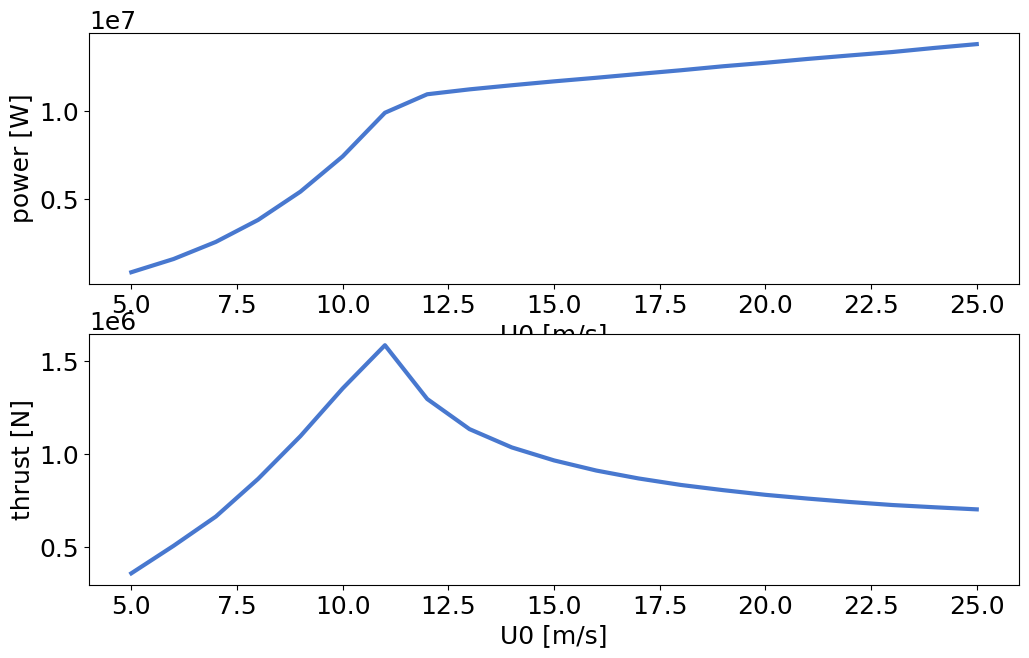

In [ ]:
fig, axs = plt.subplots(2, 1)  
# Plotting the power curve
out["power"].plot(ax=axs[0])
out["thrust"].plot(ax=axs[1])

In [ ]:
out[["CLT", "CLP"]].hvplot(x="s", dynamic=False, framewise=False)

:HoloMap   [U0]
   :NdOverlay   [Variable]
      :Curve   [s]   (value)

In [ ]:
(out["Cl"].hvplot(x="s", dynamic=False, framewise=False)
+out["Cd"].hvplot(x="s", dynamic=False, framewise=False)).cols(1)

:Layout
   .HoloMap.I  :HoloMap   [U0]
      :Curve   [s]   (Cl)
   .HoloMap.II :HoloMap   [U0]
      :Curve   [s]   (Cd)

## Using IEA 15 MW WT

In [10]:
bevc = PyBEVC()

# Setting inputs manually 
bevc.U0 = 8.0
bevc.TSR = 7


bevc.flag_a_CT = 2

htc_filename = 'iea15mw_bevc/IEA-15-240-RWT-Onshore/htc/IEA_15MW_RWT_Onshore.htc'
bevc.from_htc_file(htc_filename, model_path='data') # HAWC2 HTC file

# Display all data as an Xarray object
xr_inp = bevc.as_xarray()
xr_inp

<xarray.Dataset> Size: 317kB
Dimensions:         (s_polar: 39, aoa: 200, s: 34)
Coordinates:
  * s_polar         (s_polar) float64 312B 21.1 21.27 21.5 ... 96.27 99.04 100.0
  * aoa             (aoa) float64 2kB -180.0 -177.0 -174.0 ... 174.0 177.0 180.0
  * s               (s) float64 272B 0.0 0.01001 0.02002 ... 0.9003 0.9502 1.0
Data variables: (12/36)
    NB              int64 8B 3
    R               float64 8B 120.7
    TSR             int64 8B 7
    U0              int64 8B 12
    aoa_deg         (s_polar, aoa) float64 62kB -180.0 -177.0 ... 177.0 180.0
    aoa_rad         (s_polar, aoa) float64 62kB -3.142 -3.089 ... 3.089 3.142
    ...              ...
    twist_deg       (s) float64 272B -15.59 -15.59 -15.59 ... 2.093 1.8 1.242
    twist_rad       (s) float64 272B -0.2722 -0.2721 -0.2721 ... 0.03142 0.02168
    x               (s) float64 272B 0.02277 -0.01294 ... -0.2989 -0.06589
    x_cp            float64 8B 0.5
    y               (s) float64 272B -0.006354 0.01262 0.03159 ... -3.444 -4.001
    z               (s) float64 272B 0.0 1.171 2.342 3.513 ... 105.3 111.2 117.0

Update centre positions.

In [ ]:
# # Option 1: load a new c2 file with the new positions. Looks really slow.
# c2_filename = 'results'
# bevc.from_c2_file(c2_filename) # HAWC2 C2 file

# # Option 2: set manually 'x', 'y', 'z' and 'twist'. It's faster and easier to implement. 
# # Using a dict
# positions_dict = {'x':'x_results', 'y':'y_results', 'z':'z_results', 'twist_rad': 'twist_results'}
# bevc.from_dict(positions_dict)
# # Directly
# bevc.x = 'x_results'
# bevc.y = 'y_results'
# bevc.z = 'z_results'
# bevc.twist_rad = 'twist_results'
# # I have to make sure the dimentions are correct.

In [11]:
# Running the BEVC solver and returning an Xarray DataSet
res = bevc.run()
res

<xarray.Dataset> Size: 12kB
Dimensions:     (s: 34)
Coordinates:
  * s           (s) float64 272B 0.0 0.01001 0.02002 ... 0.9003 0.9502 1.0
Data variables: (12/47)
    r           (s) float64 272B 5.139 5.139 6.309 7.479 ... 108.9 114.6 114.6
    phi_rad     (s) float64 272B 1.281 1.281 1.22 1.16 ... 0.1228 0.1134 0.1134
    V_rel       (s) float64 272B 12.61 12.61 12.85 13.15 ... 76.62 80.54 80.54
    alpha_deg   (s) float64 272B 0.0 57.58 54.08 50.77 ... 9.524 9.083 8.259 0.0
    Ct_KJ       (s) float64 272B 0.0 0.0 0.0 0.001245 ... 0.5719 0.4972 0.0
    Ct_local    (s) float64 272B 0.0 0.1699 0.142 0.1257 ... 0.5724 0.4976 0.0
    ...          ...
    int_mx_34c  (s) float64 272B -6.046e+07 -5.951e+07 ... -5.974e+04 0.0
    int_my_34c  (s) float64 272B 9.36e+06 9.181e+06 9.001e+06 ... 1.705e+03 0.0
    int_mz_34c  (s) float64 272B 1.783e+06 1.802e+06 1.823e+06 ... 2.907e+04 0.0
    sec_mx_34c  (s) float64 272B 0.0 -11.99 -13.09 -14.69 ... 139.3 144.4 0.0
    sec_my_34c  (s) float64 272B 0.0 -21.08 -20.47 ... -1.731e+03 -1.436e+03 0.0
    sec_mz_34c  (s) float64 272B 0.0 392.9 393.6 ... 1.099e+04 8.76e+03 0.0

In [ ]:
res['int_mx']

<xarray.DataArray 'int_mx' (s: 34)> Size: 272B
array([-6.04105901e+07, -5.94568129e+07, -5.85032170e+07, -5.75502824e+07,
       -5.65976054e+07, -5.56454928e+07, -5.46937342e+07, -5.37425578e+07,
       -5.27919428e+07, -5.18420193e+07, -5.08930291e+07, -4.99451712e+07,
       -4.89989630e+07, -4.71125340e+07, -4.52360082e+07, -4.33714255e+07,
       -4.15212014e+07, -3.92326292e+07, -3.69757108e+07, -3.25758977e+07,
       -2.83551413e+07, -2.43399422e+07, -2.05532891e+07, -1.70192693e+07,
       -1.37611639e+07, -1.08000699e+07, -8.15750308e+06, -5.85407548e+06,
       -3.91010259e+06, -2.34756178e+06, -1.18484378e+06, -4.26689771e+05,
       -5.99937799e+04,  0.00000000e+00])
Coordinates:
  * s        (s) float64 272B 0.0 0.01001 0.02002 0.03003 ... 0.9003 0.9502 1.0
Attributes:
    units:        Nm
    description:  integrated x-moment (2D, blade root coordinate system)

In [ ]:
res['sec_mx']

<xarray.DataArray 'sec_mx' (s: 34)> Size: 272B
array([   0.        ,   -6.41195414,   -6.97723846,   -7.68555743,
         -8.06936316,   -8.61498343,   -9.51793879,  -11.54954607,
        -15.5301698 ,  -23.82857919,  -39.99999885,  -61.09574358,
        -78.1882678 ,  -96.50087114, -109.18367226, -109.12585743,
        -93.16437638,  -61.23975417,  -14.85184635,   21.43326721,
         28.13703898,   25.42910833,   28.69733165,   39.74117106,
         48.89809748,   56.70962432,   63.91129906,   67.74587208,
         68.03111896,   67.13845031,   65.26903427,   57.98085631,
         59.26161962,    0.        ])
Coordinates:
  * s        (s) float64 272B 0.0 0.01001 0.02002 0.03003 ... 0.9003 0.9502 1.0
Attributes:
    units:        Nm
    description:  sectional x-moment (2D, rotor coordinate system)

In [ ]:
res['sec_mx_b']

<xarray.DataArray 'sec_mx_b' (s: 34)> Size: 272B
array([   0.        ,   -6.41195414,   -6.97723846,   -7.68555743,
         -8.06936316,   -8.61498343,   -9.51793879,  -11.54954607,
        -15.5301698 ,  -23.82857919,  -39.99999885,  -61.09574358,
        -78.1882678 ,  -96.50087114, -109.18367226, -109.12585743,
        -93.16437638,  -61.23975417,  -14.85184635,   21.43326721,
         28.13703898,   25.42910833,   28.69733165,   39.74117106,
         48.89809748,   56.70962432,   63.91129906,   67.74587208,
         68.03111896,   67.13845031,   65.26903427,   57.98085631,
         59.26161962,    0.        ])
Coordinates:
  * s        (s) float64 272B 0.0 0.01001 0.02002 0.03003 ... 0.9003 0.9502 1.0
Attributes:
    units:        Nm
    description:  sectional x-moment (2D, body coordinate system)

In [20]:
loads_dict = {
    'fx': res['fx_b'].data,
    'fy': res['fy_b'].data,
    'fz': res['fz_b'].data,
    'mx': res['sec_mx_b'].data,
    'my': res['sec_my_b'].data,
    'mz': res['sec_mz_b'].data,
    
    }
loads_dict

{'fx': array([ 0.00000000e+00, -5.36386700e+01, -6.62085904e+01, -7.64638312e+01,
        -7.67578259e+01, -5.11238687e+01, -1.03856869e+00,  7.42320265e+01,
         1.71690919e+02,  3.15477917e+02,  5.52775253e+02,  7.56983971e+02,
         9.01845840e+02,  1.03678096e+03,  1.14915329e+03,  1.27437933e+03,
         1.36391542e+03,  1.46006550e+03,  1.53869992e+03,  1.61400618e+03,
         1.62506027e+03,  1.61858378e+03,  1.61007134e+03,  1.59964072e+03,
         1.58767611e+03,  1.57355473e+03,  1.55872337e+03,  1.54219745e+03,
         1.53093842e+03,  1.50971517e+03,  1.44660548e+03,  1.32741880e+03,
         1.11694926e+03,  0.00000000e+00]),
 'fy': array([    0.        ,   161.12656202,   165.21325113,   173.38214595,
          192.29452084,   236.11855483,   301.52163883,   391.36615409,
          507.86089529,   680.34609536,   962.42496536,  1261.09131335,
         1519.33184973,  1911.95317124,  2322.33878747,  2796.09646825,
         3226.3850197 ,  3763.26818667,  4295.59